<a href="https://colab.research.google.com/github/Tanushree-233/Machine_Learning/blob/main/ML_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

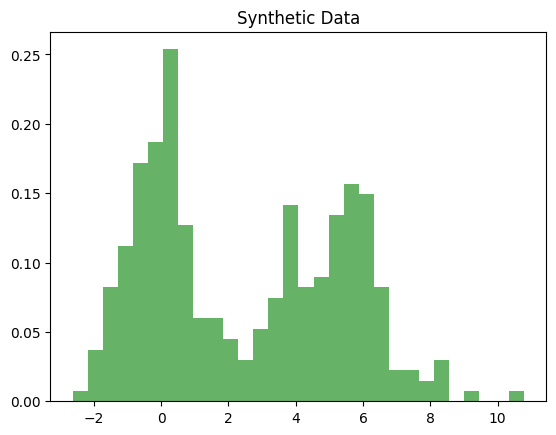

Epoch 10
Mu: [5.77199642 1.14592155]
Sigma: [1.11136442 2.23529017]
Pi: [0.29535565 0.70464435]
--------------------------------------------------
Epoch 20
Mu: [ 5.12435276 -0.07517386]
Sigma: [1.50362166 0.95250082]
Pi: [0.49762852 0.50237148]
--------------------------------------------------
Epoch 30
Mu: [ 5.03563938 -0.12821606]
Sigma: [1.58132433 0.90237424]
Pi: [0.51133789 0.48866211]
--------------------------------------------------
Epoch 40
Mu: [ 5.03460455 -0.12872482]
Sigma: [1.58228901 0.90195921]
Pi: [0.51148852 0.48851148]
--------------------------------------------------
Epoch 50
Mu: [ 5.03459223 -0.12873086]
Sigma: [1.5823005  0.90195429]
Pi: [0.51149031 0.48850969]
--------------------------------------------------
Final Parameters:
Mu: [ 5.03459223 -0.12873086]
Sigma: [1.5823005  0.90195429]
Pi: [0.51149031 0.48850969]


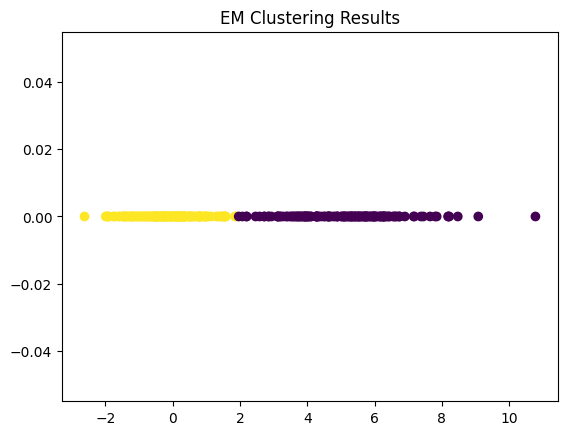

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# ----------------------------
# Generate synthetic 1D data
# ----------------------------
np.random.seed(42)
data1 = np.random.normal(0, 1, 150)
data2 = np.random.normal(5, 1.5, 150)
X = np.hstack((data1, data2)).reshape(-1, 1)

# Plot the data
plt.hist(X, bins=30, density=True, alpha=0.6, color='g')
plt.title("Synthetic Data")
plt.show()

# ----------------------------
# EM Algorithm for 2 Gaussian components
# ----------------------------
K = 2  # number of clusters
N = X.shape[0]

# Initialize parameters
mu = np.random.choice(X.flatten(), K)
sigma = np.random.random(K) + 1
pi = np.ones(K) / K  # mixing coefficients

# EM iterations
epochs = 50
for epoch in range(epochs):
    # E-step: compute responsibilities
    gamma = np.zeros((N, K))
    for k in range(K):
        gamma[:, k] = pi[k] * multivariate_normal.pdf(X.flatten(), mean=mu[k], cov=sigma[k]**2)
    gamma /= gamma.sum(axis=1, keepdims=True)

    # M-step: update parameters
    Nk = gamma.sum(axis=0)
    mu = (gamma.T @ X.flatten()) / Nk
    # Fix: Calculate sigma for each cluster separately
    for k in range(K):
      sigma[k] = np.sqrt(np.sum(gamma[:, k] * (X.flatten() - mu[k])**2) / Nk[k])
    pi = Nk / N

    # Optional: print intermediate parameters
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}")
        print("Mu:", mu)
        print("Sigma:", sigma)
        print("Pi:", pi)
        print("-"*50)

# ----------------------------
# Results
# ----------------------------
print("Final Parameters:")
print("Mu:", mu)
print("Sigma:", sigma)
print("Pi:", pi)

# Assign cluster based on maximum responsibility
cluster = np.argmax(gamma, axis=1)

# Plot clustered data
plt.scatter(X, np.zeros_like(X), c=cluster, cmap='viridis')
plt.title("EM Clustering Results")
plt.show()